<a href="https://colab.research.google.com/github/rafaellsma/adsense-analysis/blob/main/adsense-anlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADWORDS [by Query Explorer](https://ga-dev-tools.appspot.com/query-explorer)

IF697 — Introdução à Ciência dos Dados

Prof. Dr. Luciano Barbosa

Alunos: Hywre Cesar & Rafael Albuquerque

# Introdução
Através da plataforma Query Explorer, obtivemos um dataset que une os produtos do Google (Analytics/Search Console/AdWords) com informações sobre anuncios direcionados as buscas relacionadas a Farmácia. Tratam-se de dados reais retiradas de um estudo de caso de um estabelecimento localizado em Olinda - PE por meio da ferramenta do Google Query Explorer que integra as demais feramentas que apoiam os comércios locais.

Dividimos o trabalho em etapas, sendo a primeira a de pré-processamento do dataset que consistia em: limpeza de outliers, removendo dados irrelevantes e tratando dados importantes ausentes. Apesar de subjulgada, essa etapa é uma das mais importantes pois servirá de base para as demais processamentos.

Em seguida, apresentaremos estatísticas descritivas com visualizaçcões e os teste de hipotestes levantados para o modelo de negócio proposto. Compararando categorias e sua significância, visamos extrair informações para o modelo de negócio e da importância de conhecer seu público alvo na tomada de decisões.

[**O QUE FALTA?**] Pequena exploração dos resultados e discussão

# Objetivos
Extrair dados, se valendo de estatística descritiva e testes de hipóteses, para gerar informações de importância para a microempresa, de modo, por exemplo, a caracterizar seu público alvo e com isso formar políticas e estratégias para pequenos estabelecimentos aos quais negligenciam, muitas vezes, análise de dados para nortear planos de investimentos ou corrigir falhas.

# Materiais e Métodos
Para essa análise utilizamos as ferramentas do Google tais como: Adwords, Search Console e Analytics, centralizadas pela ferramenta Query Explorer, que agrupa os dados e correlaciona-os, segundo as limitações das ferramentas, visto que nem sempre todas são disparadas ao mesmo tempo durante o evento acesso a página web.

Utilizamos a linguagem de programação Python 3.6, padrão do ambiente de desenvolvimento Google Colab, elegida  ferramenta para análises de dados pois abarca como vantagem a execução centralizada, independente de plataforma e colaborativa entre os participantes do grupo.

# Resultados e discussões


## Coleta dos dados
Como a ferramenta Query Explorer (**Bônus 1B - Extrair dados da Web**) possui limitações que impedem a exportação completa dos dados, utilizamos como chave primária a concatenação da data-hora do evento e do termo da pesquisa que acionou o evento. Com isso saímos de uma limitação de 7 colunas para 36 colunas, com incrementos de 5 colunas, visto que duas estavam ocupadas com a chave primária.

Muito dos dados foram perdidos, seja por dados truncados que comprometiam a chave primária, gerados pela própria ferramenta do Google, seja por não necessariamente gerar dados em todas as três ferramentas ao mesmo tempo, por exemplo por uma pesquisa orgânica.

Nessa etapa, saímos de um dataset de 95mil eventos para apenas cerca de 21mil, em compensação aumentamos a riqueza dos dados, adicionando colunas que identificam até o tipo de tela do usuário naquele evento. Para facilitar a interoperabilidade, convertemos os dados para csv (valores separados por vírgulas).



## Configuração do ambiente
Abaixo segue a configuração do ambiente, por meio da ferramenta Pandas. Trata-se de umma biblioteca em Python que oferece infraestrutura para manipulação dos dados e séries temporais.

Verificou-se que os dados foram importados com êxito gerando exatos 21306 linhas de dados, distribuídas em 36 colunas.  

In [1]:
#importação do Pandas
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None

#import numpy
import numpy as np
from numpy import log10

#importação do requests para::
import requests as rqs

#desabilitando warnings para::
import warnings
warnings.filterwarnings('ignore')

#seaborn
import seaborn as sbn

#plots
import matplotlib.pyplot as plt

#To display Bokeh plots inline in a classic Jupyter notebook
from bokeh.io import output_notebook
output_notebook()

#to hypotesys
from scipy import stats

#Check file location
if 'google.colab' in str(get_ipython()):
  dataset = pd.read_csv("https://raw.githubusercontent.com/rafaellsma/adsense-analysis/main/dataset%20210316.csv?token=AFJ2KTV22I46NJWANG74PYLAMC5XS", sep=";")
else:
  dataset = pd.read_csv("dataset 210316.csv", sep=";")

# size of dataset
print("Size of dataset is (row x col): " + str(dataset.shape) + "\npreview dos dados...")

# preview where "n = 2" is rows e 12 primeiras colunas
rows = 2
dataset.head(rows)

#Marcado para remoção
#from scipy import stats
#from bokeh.plotting import figure
#from bokeh.plotting import figure, show
#from bokeh.palettes import Spectral6
#from bokeh.transform import factor_cmap
#from bokeh.models import ColumnDataSource

Size of dataset is (row x col): (21306, 36)
preview dos dados...


,dateHourMinute,adMatchedQuery,city,latitude,longitude,networkDomain,networkLocation,users,flashVersion,javaEnabled,language,screenResolution,screenName,browser,operatingSystem,mobileDeviceInfo,adSlot,adMatchType,adFormat,adTargetingType,adwordsCriteriaID,impressions,adClicks,adCost,CPM,CPC,CTR,costPerConversion,sessionDuration,organicSearches,goal1Starts,pageviews,uniquePageviews,timeOnPage,exits,pageLoadTime
0,201901150113,comprar terramicina polimixina b,Carpina,"-7,845","-35,2437",planaltonet.net.br,planalto net,1,(not set),No,pt-br,640x360,farmacia12.com.br/index2.html,Chrome,Android,Asus X00LD Zenfone 4 Selfie ZD553KL,Google search: Top,Broad match,Text,Keyword,309449757504,0,0,0,0,0,0,0,0.0,0,1,1,1,0,1,0
1,201901150752,remedios homeopaticos onde comprar,Recife,"-8,0522","-34,9286",(not set),claro s.a.,1,(not set),No,pt-br,360x760,farmacia12.com.br/,Chrome,Android,(not set),Google search: Other,Phrase match,Text,Keyword,1639245696,1,1,"0,03",30,"0,03",100,"0,03",23.0,0,1,3,2,23,1,0


In [2]:
print(dataset.shape)
dataset.head()

(21306, 36)


,dateHourMinute,adMatchedQuery,city,latitude,longitude,networkDomain,networkLocation,users,flashVersion,javaEnabled,language,screenResolution,screenName,browser,operatingSystem,mobileDeviceInfo,adSlot,adMatchType,adFormat,adTargetingType,adwordsCriteriaID,impressions,adClicks,adCost,CPM,CPC,CTR,costPerConversion,sessionDuration,organicSearches,goal1Starts,pageviews,uniquePageviews,timeOnPage,exits,pageLoadTime
0,201901150113,comprar terramicina polimixina b,Carpina,"-7,845","-35,2437",planaltonet.net.br,planalto net,1,(not set),No,pt-br,640x360,farmacia12.com.br/index2.html,Chrome,Android,Asus X00LD Zenfone 4 Selfie ZD553KL,Google search: Top,Broad match,Text,Keyword,309449757504,0,0,0,0,0,0,0,0.0,0,1,1,1,0,1,0
1,201901150752,remedios homeopaticos onde comprar,Recife,"-8,0522","-34,9286",(not set),claro s.a.,1,(not set),No,pt-br,360x760,farmacia12.com.br/,Chrome,Android,(not set),Google search: Other,Phrase match,Text,Keyword,1639245696,1,1,"0,03",30,"0,03",100,"0,03",23.0,0,1,3,2,23,1,0
2,201901150753,farmácia são paulo olinda estoque,Recife,"-8,0522","-34,9286",(not set),telef nica brasil s.a,1,(not set),No,pt-br,360x640,farmacia12.com.br/,Chrome,Android,Motorola Moto G (4) Moto G4,Google search: Top,Phrase match,Text,Keyword,10334511,1,1,"0,27",270,"0,27",100,0,0.0,0,0,1,1,0,1,0
3,201901150754,farmacia independente olinda,Olinda,"-7,9906","-34,8417",(not set),claro s.a.,1,(not set),No,pt-br,360x640,farmacia12.com.br/,Chrome,Android,Samsung SM-A520F Galaxy A5 (2017),Google search: Top,Broad match,Text,Keyword,384100548605,1,1,"0,27",270,"0,27",100,"0,27",15.0,0,1,3,2,15,1,0
4,201901150801,qual o remédio certo correto para tirar dor no...,Igarassu,"-7,8333","-34,9128",naveganet.com.br,naveganet comercio e servi os ltda,1,(not set),No,pt-br,360x720,farmacia12.com.br/,Chrome,Android,(not set),Google search: Top,Phrase match,Text,Keyword,12772586,1,1,"0,27",270,"0,27",100,"0,27",11.0,0,1,2,2,11,1,0


## Preprocessamento

### Definição dos tipos
Nessa parte do trabalho, observou-se que boa parte dos tipos estão como object. Portanto, ocorrerá o ajuste para tipos mais adequados como: data-hora, string, category, float e int, dependendo da característica do dado.

In [3]:
try:
  dataset.dateHourMinute = pd.to_datetime(dataset.dateHourMinute, format="%Y%m%d%H%M")
  dataset.adMatchedQuery = dataset.adMatchedQuery.astype('str')
  dataset.city = dataset.city.astype('category')
  dataset.latitude = dataset.latitude.astype('str').str.replace(',', '.').astype('float64')
  dataset.longitude = dataset.longitude.astype('str').str.replace(',', '.').astype('float64')
  dataset.networkDomain = dataset.networkDomain.astype('category')
  dataset.networkLocation = dataset.networkLocation.astype('category')
  dataset.flashVersion = dataset.flashVersion.astype('category')
  dataset.javaEnabled = dataset.javaEnabled.replace({True: 'Yes', False: 'No'}).astype('bool')
  dataset.language = dataset.language.astype('category')
  dataset.screenResolution = dataset.screenResolution.astype('category')
  dataset.screenName = dataset.screenName.astype('category')
  dataset.browser = dataset.browser.astype('category')
  dataset.operatingSystem = dataset.operatingSystem.astype('category')
  dataset.mobileDeviceInfo = dataset.mobileDeviceInfo.astype('category')
  dataset.adSlot = dataset.adSlot.astype('category')
  dataset.adMatchType = dataset.adMatchType.astype('category')
  dataset.adFormat = dataset.adFormat.astype('category')
  dataset.adTargetingType = dataset.adTargetingType.astype('category')
  dataset.adwordsCriteriaID = dataset.adwordsCriteriaID.astype('category')
  dataset.impressions = dataset.impressions.astype('int64')
  dataset.adClicks = dataset.adClicks.astype('int64')
  dataset.adCost = dataset.adCost.astype('str').str.replace(',', '.').astype('float64')
  dataset.CPM = dataset.CPM.astype('str').str.replace(',', '.').astype('float64')
  dataset.CPC = dataset.CPC.astype('str').str.replace(',', '.').astype('float64')
  dataset.CTR = dataset.CTR.astype('str').str.replace(',', '.').astype('float64')
  dataset.costPerConversion = dataset.costPerConversion.astype('str').str.replace(',', '.').astype('float64')
  dataset.sessionDuration = dataset.sessionDuration.astype('int64')
except:
  print("Falha na operação, verifique.")
finally:
  print("Todas as operações efetuadas com sucesso.")
  dataset.info()

Todas as operações efetuadas com sucesso.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21306 entries, 0 to 21305
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dateHourMinute     21306 non-null  datetime64[ns]
 1   adMatchedQuery     21306 non-null  object        
 2   city               21306 non-null  category      
 3   latitude           21306 non-null  float64       
 4   longitude          21306 non-null  float64       
 5   networkDomain      21306 non-null  category      
 6   networkLocation    21306 non-null  category      
 7   users              21306 non-null  int64         
 8   flashVersion       21306 non-null  category      
 9   javaEnabled        21306 non-null  bool          
 10  language           21306 non-null  category      
 11  screenResolution   21306 non-null  category      
 12  screenName         21306 non-null  category      
 13  browser            

### Tratamento de dados irrelevantes
Nesse ponto, primeiramente, utilizou-se o `.describe` para analisar todos os dados categoricos e ver quais são os que tem ou não valores para o nosso dataset. Filtramos apenas os dados categóricos, ou seja, dados que expressão um grupo ou categoria.

#### Remoção de linhas
Percebe-se abaixo que nesse momento que a coluna *city* tem 72 valores distintos, isso significa que tem mais cidades capturadas das quais queremos trabalhar. Como se trata de um comercio com abraangência local, só é do interesse cidades da região metropolitana do Recife.

Removendo as cidades que não são do interesse, temos:

In [4]:
# exibir apenas os dados categóricos
dataset.describe(include=['category'])

,city,networkDomain,networkLocation,flashVersion,language,screenResolution,screenName,browser,operatingSystem,mobileDeviceInfo,adSlot,adMatchType,adFormat,adTargetingType,adwordsCriteriaID
count,21306,21306,21306,21306,21306,21306,21306,21306,21306,21306,21306,21306,21306,21306,21306
unique,72,90,279,6,31,213,13,13,6,702,5,4,2,2,277
top,Olinda,(not set),(not set),(not set),pt-br,360x640,farmacia12.com.br/,Chrome,Android,Apple iPhone,Google search: Top,Broad match,Text,Keyword,10334511
freq,8271,10839,6581,21299,20777,10198,20113,18725,19885,1342,17154,14380,21287,21287,1696


In [5]:
#lista de cidades permitidas, ou do nosso interesse
allowed_cities = [
    'Abreu e Lima', 
    'Cabo de Santo Agostinho', 
    'Camaragibe', 
    'Goiana', 
    'Igarassu', 
    'Itamaraca', 
    'Ipojuca', 
    'Itapissuma',
    'Jaboatao dos Guararapes',
    'Moreno',
    'Olinda',
    'Paulista',
    'Recife',
    'Sao Lourenco da Mata'
]
try:
  #substituímos o dataset por um que contenha apenas as linhas permitidas
  dataset = dataset[dataset.city.isin(allowed_cities)]
except:
  print("falha na execução")

#verificamos os dados e o sucesso da operação
dataset.describe(include=['category'])

,city,networkDomain,networkLocation,flashVersion,language,screenResolution,screenName,browser,operatingSystem,mobileDeviceInfo,adSlot,adMatchType,adFormat,adTargetingType,adwordsCriteriaID
count,18792,18792,18792,18792,18792,18792,18792,18792,18792,18792,18792,18792,18792,18792,18792
unique,14,64,238,6,28,201,12,13,6,667,5,4,2,2,267
top,Olinda,(not set),(not set),(not set),pt-br,360x640,farmacia12.com.br/,Chrome,Android,Apple iPhone,Google search: Top,Broad match,Text,Keyword,10334511
freq,8271,9251,6248,18785,18318,8927,17758,16545,17561,1158,14961,12644,18775,18775,1514


#### Remoção de colunas
Continuando, observa-se a presença de muitas ocorrências de `(not set)` que são os null nas colunas `networkDomain`, `networkLocation` e `flashVersion`. São informações sobre qual é o provedor, gateway e a versão flash do navegador. É de conhecimento que a Abobe finalizou o suporte ao Flash no fim de 2020, e gradativamente está sendo desabilitado em navegadores e sistemas operacionais. Portanto, decidiu-se apaga-las.

Temos outros 28 valores diferente para `language`, como houve uma filtragem prévia apenas para a região metropolitana, aparentemente trata-se de uma inconsistência, vpns ou turistas. Devido a dificuldade de tratar esses casos, removemos essas linhas do dataset. Outra coluna, que inicialmente serviu como chave primária para a concatenação de exportações, é a adwordsCriteriaID, com ids unicos gerados pelo Google, sem outras pretenções. Decidiu-se simplificar a coluna também.

In [6]:
try:
  if 'networkDomain' in dataset:
    dataset = dataset.drop(columns=['networkDomain', 'networkLocation', 'flashVersion', 'language', 'adwordsCriteriaID'])
except:
  print("Falha na execução")

#resultado atual
dataset.describe(include=['category'])

,city,screenResolution,screenName,browser,operatingSystem,mobileDeviceInfo,adSlot,adMatchType,adFormat,adTargetingType
count,18792,18792,18792,18792,18792,18792,18792,18792,18792,18792
unique,14,201,12,13,6,667,5,4,2,2
top,Olinda,360x640,farmacia12.com.br/,Chrome,Android,Apple iPhone,Google search: Top,Broad match,Text,Keyword
freq,8271,8927,17758,16545,17561,1158,14961,12644,18775,18775


#### Remoção de dados únicos
Algumas colunas tem poucos valores únicos, ao analisar-las usando `.value_counts()` para entender o que esse valores significam.

Observou-se que as colunas: `screenName`, `adFormat` e `adTargetingType` tem valores pouco representativos. Por exemplo, `screenName` tem valores unários pois todos esses dados são, basicamente, do mesmo website, com algumas poucas informações sobre a origem do clique.

Já no `adForma` e `adTargetingType` são uninário pois todos os anuncios são para o mesmo buscador do google e anúncios de texto.

In [7]:
if 'screenName' in dataset:
  print("{}, \n".format(dataset.screenName.value_counts()))
  print("{}, \n".format(dataset.adFormat.value_counts()))
  print("{}, \n".format(dataset.adTargetingType.value_counts()))

print("{}, \n".format(dataset.browser.value_counts()))
print("{}, \n".format(dataset.operatingSystem.value_counts()))
print("{}, \n".format(dataset.adSlot.value_counts()))
print("{}, \n".format(dataset.adMatchType.value_counts()))

try:
  dataset = dataset.drop(columns=['screenName', 'adFormat', 'adTargetingType'])
except:
  if 'sceenName' in dataset:
    print("falha na execução")
  else:
    print("Coluna removida anteriormente, reinicie sua MV")

farmacia12.com.br/                                                                                                                                                                                                                                                 17758
farmacia12.com.br/index2.html                                                                                                                                                                                                                                        832
farmacia12.com.br/pagar.html                                                                                                                                                                                                                                          98
farmacia12.com.br/lista_medicamento.html                                                                                                                                                                     

##### Dados booleanos
Nesse ponto, verificamos as características de nossos dados booleanos. Observamos que possuímos apenas a característica de que se possui ou não a JVM habilitada em seu navegador `javaEnabled`.

Como observou-se que está completamente setada como true, decidiu-se por remover-la.

In [8]:
#quais os valores únicos?
if 'javaEnabled' in dataset:
  dataset['javaEnabled'].unique()
  dataset = dataset.drop(columns=['javaEnabled'])
  print("Coluna `javaEnable` removida com sucesso")
else:
  print("Coluna já removida, reinicie MV")

Coluna `javaEnable` removida com sucesso


##### Dados numéricos
Olhando agora para os dados numéricos no dataset, tentou-se observar quais características são relevantes para o estudo, e quais são inconsistentes e seguirão para remoção. A maior parte do dataset é composto por esse tipo de dado.

In [9]:
#descrição breve sobre os dados
dataset.describe(include=['number'], percentiles=[.25, .5, .75, .9, .99])

,latitude,longitude,users,impressions,adClicks,adCost,CPM,CPC,CTR,costPerConversion,sessionDuration,organicSearches,goal1Starts,pageviews,uniquePageviews,timeOnPage,exits,pageLoadTime
count,18792.00000,18792.000000,18792.000000,18792.000000,18792.000000,18792.000000,1.879200e+04,18792.000000,1.879200e+04,18792.000000,18792.000000,18792.000000,18792.000000,18792.000000,18792.000000,18792.000000,18792.000000,18792.000000
mean,-8.00488,-34.881276,1.001117,1.150649,1.003140,1.611762,3.951189e+14,0.211555,2.117012e+14,0.864692,71.284217,0.000958,0.706950,3.097435,2.014527,71.255428,0.994785,124.123138
std,0.04519,0.040569,0.033411,1.266024,0.492443,127.672850,3.594422e+15,0.118098,2.071043e+15,88.354133,187.347568,0.032610,0.468312,2.416688,1.001490,181.734060,0.187339,1701.595126
min,-8.39810,-35.104500,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.05220,-34.928600,1.000000,1.000000,1.000000,0.140000,1.200000e+02,0.130000,1.000000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,-7.99060,-34.873500,1.000000,1.000000,1.000000,0.260000,2.500000e+02,0.240000,1.000000e+02,0.144200,14.000000,0.000000,1.000000,3.000000,2.000000,14.000000,1.000000,0.000000
75%,-7.99060,-34.841700,1.000000,1.000000,1.000000,0.310000,3.100000e+02,0.300000,1.000000e+02,0.280000,58.000000,0.000000,1.000000,4.000000,2.000000,59.000000,1.000000,0.000000
90%,-7.93760,-34.841700,1.000000,2.000000,2.000000,0.380000,3.800000e+02,0.340000,2.000000e+02,0.340000,171.000000,0.000000,1.000000,6.000000,3.000000,173.000000,1.000000,0.000000
99%,-7.93760,-34.841700,1.000000,7.000000,2.000000,0.700000,1.309998e+16,0.440000,6.666670e+15,0.680000,1030.090000,0.000000,1.000000,12.000000,5.000000,989.270000,2.000000,0.000000
max,-7.56300,-34.841700,2.000000,21.000000,5.000000,12635.000000,5.783330e+16,1.030000,7.692310e+16,12058.000000,2937.000000,2.000000,3.000000,49.000000,10.000000,2937.000000,3.000000,76721.000000


Observa-se que: `users`, como esperado possui, em 99% das ocorrências, valores únicos, pois representaria o comportamente de apenas um único usuário durante a amostragem. Para manter a correlação de latitude, longitude e deviceInfo, decidiu remover a coluna.

As colunas `CPM` e `CPC` são duas métricas de performance dos anúncios que decidirmos por não utilizar nesse projeto, devido a complexidade. Razão pela qual também removemos `uniquePageviews`.

`CTR` é uma métrica da razão entre número de cliques por número de impressões. Aparentemente, durante o processo de conversão ou exportação dos dados, houve alguma corrupção. Para sanar o problema, decidiu-se remover a coluna e recalcular com as colunas adClick e impressions.

Outras colunas que praticamente não possuem diversidade são `organicSearches` e `goal1Starts`, então nós decidimos em remover-la. `exits` tem uma distribuição muito parecida com `adClicks`, então optamos por remover-la e a nossa taxa de rejeição sera baseado pelo tempo na página.

`pageLoadTime` foi uma decepção para o projeto, pois havia esperança de relacionar com a taxa de rejeição, ou seja, medir a desistência devido a demora ao carregar a página, mas havia menos de 1% de instancias com valores diferentes de 0. Decidiu-se remover-la também.

As colunas `sessionDuration` e `timeOnPage` são iguais, portanto, optou-se por manter apenas `timeOnPage`

Na coluna `impressions` iremos remover todas as instancias com 0 impressões pois cada instancia deveria, por lógica, representar 1 ou mais impressões.

Por fim, por não haverem outras colunas correlacionando a conversão, como por exemplo quantidade de compras no site, e da incerteza da sua acuracia, decidiu-se remover `costPerConversion`.

In [10]:
try:
  if 'users' in dataset:
    #remoção de colunas
    dataset = dataset.drop(columns=['users', 'CPM', 'CPC', 'CTR', 'organicSearches', 'goal1Starts', 'uniquePageviews', 'exits', 'pageLoadTime', 'sessionDuration', 'costPerConversion'])
    
    #remoção de linhas nulas
    dataset = dataset[dataset.impressions > 0]
    
    #reconstrução da coluna CTR
    dataset['ctr'] = dataset.adClicks.divide(dataset.impressions)
    dataset.ctr = dataset.ctr.fillna(0)
    
    print("Operações executadas com sucesso")
  else:
    print("Colunas já removidas, favor reiniciar sua MV")
except:
  print("Falha na execução")

dataset.describe(include='all', datetime_is_numeric=True)
  

Operações executadas com sucesso


,dateHourMinute,adMatchedQuery,city,latitude,longitude,screenResolution,browser,operatingSystem,mobileDeviceInfo,adSlot,adMatchType,impressions,adClicks,adCost,pageviews,timeOnPage,ctr
count,16745,16745,16745,16745.000000,16745.000000,16745,16745,16745,16745,16745,16745,16745.000000,16745.000000,16745.000000,16745.000000,16745.000000,16745.000000
unique,NaN,10659,14,NaN,NaN,186,13,6,647,4,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,farmacia pague menos,Olinda,NaN,NaN,360x640,Chrome,Android,Apple iPhone,Google search: Top,Broad match,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,344,7207,NaN,NaN,8170,15040,15667,1010,13484,11276,NaN,NaN,NaN,NaN,NaN,NaN
mean,2019-10-11 09:00:21.126307072,NaN,NaN,-8.005151,-34.881921,NaN,NaN,NaN,NaN,NaN,NaN,1.291311,1.125769,1.808792,3.149298,70.519737,1.025961
min,2019-01-15 07:52:00,NaN,NaN,-8.398100,-35.104500,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2019-04-18 17:05:00,NaN,NaN,-8.052200,-34.928600,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.180000,1.000000,0.000000,1.000000
50%,2019-07-31 21:44:00,NaN,NaN,-7.990600,-34.873500,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.270000,3.000000,15.000000,1.000000
75%,2020-03-27 15:16:00,NaN,NaN,-7.990600,-34.841700,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.320000,4.000000,61.000000,1.000000
max,2021-03-13 21:15:00,NaN,NaN,-7.563000,-34.841700,NaN,NaN,NaN,NaN,NaN,NaN,21.000000,5.000000,12635.000000,26.000000,2937.000000,3.000000


##### Eventos *(not set)*
Algumas eventos não foram completamente disparados durante a coleta, e foram marcados como `(not set)` que é observados em vários momentos do dataset. Decidiu-se por remover todas as suas ocorrências em dados categoricos ou object (`adMatchedQuery`).

In [11]:
print("Antes do processamento {}".format(dataset.shape))
for column in dataset.columns:
    if dataset.dtypes[column].name == 'category' or dataset.dtypes[column].name == 'object':
        dataset = dataset[(dataset[column] != '(not set)')]
        if dataset.dtypes[column].name == 'category':
            dataset[column].cat.remove_unused_categories(inplace=True)
dataset.reset_index(drop=True, inplace=True)

print("Após o processamento {}".format(dataset.shape))

Antes do processamento (16745, 17)
Após o processamento (16183, 17)


#### Remoção de duplicadas no dataset
Por entender que se tratam de eventos únicos, observados pela coleta com resolução de minutos, decidiu-se remover valores duplicados e, portanto, inconsistentes.

In [12]:
#remoção de duplicadas sem retornar novo objeto: 'inplace'
dataset.drop_duplicates(inplace=True)

### Discretização de dados
Nesse momento, optou-se por dividir em quatro grupos, discretizando de acordo com o tamanho de tela: small, medium, large, xlarge, pelo dado existente em `screenResolution`.

In [13]:
def transformScreenResolutionInDPI(resolution):
    x = resolution.split('x')
    return int(x[0]) * int(x[1])
    return 0
    
dataset['screenResolutionDist'] = pd.cut(dataset.screenResolution.apply(transformScreenResolutionInDPI), 6, labels=['x-small', 'small', 'medium', 'large', 'xlarge', '2x-large'])

### Georreferenciamento (API)
Com a lat/lng iremos usar um geocoding reverso (**Bônus 1A - Integrar dados API**) para trazer a granularidade de bairro(locality) para o dataset.

Como podemos ver em seguida, todas a lat/lng são unicas por cidade. Verificou-se se foi um erro na coleta de dados, mas os dados já foram recebidos dessa forma do Google Analytics. Acreditamos que seja algum mecanismo para preservar a privacidade do usuário.

In [14]:
cache = dict()

def getLocality(*args):
    if args in cache:
        return cache[args]
    request = rqs.get(f'https://api.bigdatacloud.net/data/reverse-geocode-client?latitude={args[0]}&longitude={args[1]}&localityLanguage=pt')
    result = request.json()['locality']
    cache[args] = result
    return result

#construção da coluna localidade
if 'locality' not in dataset:
  dataset['locality'] = dataset.apply(lambda x: getLocality(x.latitude, x.longitude), axis=1)

#remoção das colunas latitude e longitude
if 'latitude' in dataset:
  dataset = dataset.drop(columns=['latitude', 'longitude'])

#Vizualização das colunas geradas
print(dataset.locality.value_counts())
print(dataset.city.value_counts())

Casa Caiada                  7015
Cordeiro                     6195
Paulista                     2795
Abreu e Lima                   40
Igarassu                       35
São Lourenço da Mata           30
Piedade                        29
Centro                         14
Camaragibe                     11
Cidade Criança Área Rural       6
Moreno                          4
Ipojuca                         4
Goiana                          4
Ilha de Itamaracá               1
Name: locality, dtype: int64
Olinda                     7015
Recife                     6195
Paulista                   2795
Abreu e Lima                 40
Igarassu                     35
Sao Lourenco da Mata         30
Jaboatao dos Guararapes      29
Cabo de Santo Agostinho      14
Camaragibe                   11
Itapissuma                    6
Moreno                        4
Ipojuca                       4
Goiana                        4
Itamaraca                     1
Name: city, dtype: int64


### Inputação de dados ausentes
Pode-se observar na celula abaixo a presença de valores zerados para `adClicks`, `adCost` e `timeOnPage`, então, decidiu-se utilizar as técnicas que se seguem para poder supor dados ausentes.

Primeiramente, faz-se uma análise estatística descritiva dos dados de modo a determinar se a análise provocará comportamentos anômalos aos dados. Nas próximas etapas, sempre se comparou-se o antes e o depois do processamento, de forma a observar o impacto da técnica. 

In [15]:
dataset.describe(include=['number'], percentiles=[0.25, 0.5, 0.75, 0.9, 0.99])

,impressions,adClicks,adCost,pageviews,timeOnPage,ctr
count,16183.000000,16183.000000,16183.000000,16183.000000,16183.000000,16183.000000
mean,1.291726,1.126429,1.862046,3.145770,70.580362,1.026105
std,1.266390,0.367151,137.579015,2.404589,176.207464,0.351294
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.170000,1.000000,0.000000,1.000000
50%,1.000000,1.000000,0.270000,3.000000,15.000000,1.000000
75%,1.000000,1.000000,0.320000,4.000000,61.000000,1.000000
90%,2.000000,2.000000,0.390000,6.000000,172.800000,1.000000
99%,8.000000,2.000000,0.720000,12.000000,962.000000,2.000000
max,21.000000,5.000000,12635.000000,26.000000,2937.000000,3.000000


#### Mediana
É o valor que separa a metade maior da metade menor de uma amostra, uma população ou uma distribuição de probabilidade. Em termos mais simples, trata-se do valor do meio. Abaixo, pode-se observar que o valor da média e do desvio padrão se mantém muito próximo, até a terceira casa decimal, sendo um bom resultado, para valores discretos.

In [16]:
print("Antes da execução {}". format(dataset.adClicks.describe()))
dataset.adClicks = dataset.adClicks.replace(0, dataset.adClicks.median())
print("Após a execução {}". format(dataset.adClicks.describe()))

Antes da execução count    16183.000000
mean         1.126429
std          0.367151
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: adClicks, dtype: float64
Após a execução count    16183.000000
mean         1.128406
std          0.363756
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: adClicks, dtype: float64


Nesse ponto temos a utilização da mesma técnica de mediana para `adCost`. Novamente o valor da média e mediana se manteve muito próximo até a quarta casa decimal. O que é um resultado excelente visto que o significado dessa variável é o valor, em reais, do custo daquele clique. Como a maioria das negociações se dá até os centavos, praticamente não se alterou o comportamento dessa coluna.

In [17]:
print("Antes da execução {}". format(dataset.adCost.describe()))
dataset.adCost = dataset.adCost.replace(0, dataset.adCost.median())
print("Após a execução {}". format(dataset.adCost.describe()))

Antes da execução count    16183.000000
mean         1.862046
std        137.579015
min          0.000000
25%          0.170000
50%          0.270000
75%          0.320000
max      12635.000000
Name: adCost, dtype: float64
Após a execução count    16183.000000
mean         1.862580
std        137.579008
min          0.010000
25%          0.170000
50%          0.270000
75%          0.320000
max      12635.000000
Name: adCost, dtype: float64


#### Correlação de Spearman
Por meio do coeficiente de *spearman* que avalia a relação entre duas variáveis. podemos observar que as maiores correlações estão entre as colunas: `pageviews` x `timeOnPage`, com 0,89 e, obviamente as relações: ctr (taxa de cliques/impressão) x `adClicks` x `impressions`.

In [18]:
#método de correlação entre as colunas
dataset.corr(method='spearman')

,impressions,adClicks,adCost,pageviews,timeOnPage,ctr
impressions,1.000000,0.203752,0.020902,0.035394,0.035629,-0.685490
adClicks,0.203752,1.000000,0.368935,0.142007,0.142340,0.522918
adCost,0.020902,0.368935,1.000000,-0.025138,-0.045228,0.229440
pageviews,0.035394,0.142007,-0.025138,1.000000,0.886518,0.078577
timeOnPage,0.035629,0.142340,-0.045228,0.886518,1.000000,0.077993
ctr,-0.685490,0.522918,0.229440,0.078577,0.077993,1.000000


#### KNN
Pela análise anterior da correlação e distribuição, que observou uma forte correlação entre `timeOnPage` e `pageviews`, pode-se usar o algoritmo de classificação de vizinhos k-mais próximos para inputar essa coluna.

In [19]:
from sklearn.impute import KNNImputer
aux = dataset[['timeOnPage', 'pageviews']].replace(0, np.nan)
print(aux.describe())
imputer = KNNImputer(n_neighbors=5)
imputer.fit(aux)
x = imputer.transform(aux)
x = pd.DataFrame(x, columns = ['timeOnPage', 'pageviews'])
print(x.describe())
dataset[['timeOnPage', 'pageviews']] = x

         timeOnPage     pageviews
count  11849.000000  16183.000000
mean      96.396489      3.145770
std      199.794971      2.404589
min        1.000000      1.000000
25%       12.000000      1.000000
50%       32.000000      3.000000
75%       92.000000      4.000000
max     2937.000000     26.000000
         timeOnPage     pageviews
count  16183.000000  16183.000000
mean     147.220763      3.145770
std      190.885873      2.404589
min        1.000000      1.000000
25%       16.000000      1.000000
50%       67.000000      3.000000
75%      288.200000      4.000000
max     2937.000000     26.000000


### Detecção de outliers
Nessa etapa temos a detecção de outliers em atributos categóricos, por meio dos seguintes métodos de detecção univariados abaixo.

#### Normalização dos dados
Alguns dos dados nessa seção foram normalizados por logaritmo.

In [20]:
print(dataset.shape)
dataset.describe(include=['number'], percentiles=[0.25, 0.5, 0.75, 0.9, 0.99])

(16183, 17)


,impressions,adClicks,adCost,pageviews,timeOnPage,ctr
count,16183.000000,16183.000000,16183.000000,16183.000000,16183.000000,16183.000000
mean,1.291726,1.128406,1.862580,3.145770,147.220763,1.026105
std,1.266390,0.363756,137.579008,2.404589,190.885873,0.351294
min,1.000000,1.000000,0.010000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,0.170000,1.000000,16.000000,1.000000
50%,1.000000,1.000000,0.270000,3.000000,67.000000,1.000000
75%,1.000000,1.000000,0.320000,4.000000,288.200000,1.000000
90%,2.000000,2.000000,0.390000,6.000000,288.200000,1.000000
99%,8.000000,2.000000,0.720000,12.000000,962.000000,2.000000
max,21.000000,5.000000,12635.000000,26.000000,2937.000000,3.000000


#### Tukey

impressions       AxesSubplot(0.125,0.657941;0.227941x0.222059)
adClicks       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
adCost         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
pageviews         AxesSubplot(0.125,0.391471;0.227941x0.222059)
timeOnPage     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
ctr            AxesSubplot(0.672059,0.391471;0.227941x0.222059)
dtype: object

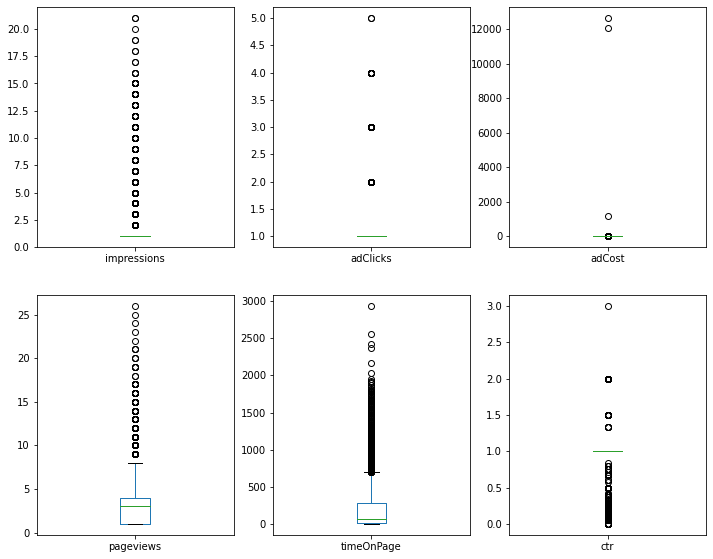

In [21]:
dataset.plot.box(subplots=True, layout=(3,3), figsize=(12,15))

In [22]:
from numpy import abs

def histToRobustZScore(s):
    ((abs(log10(s)-log10(s).median())) / log10(s).mad()).plot.hist()
    
def removeBasedOnRobustZScore(s, score):
    return s[((abs(log10(s)-log10(s).median())) / log10(s).mad()) < score]
            
def removeBasedOnTukey(s):
    q1 = log10(s).quantile(0.25)
    q3 = log10(s).quantile(0.75)
    iqr = q3-q1
    return s[(log10(s) >= (q1-1.5*iqr)) & (log10(s) <= (q3+1.5*iqr))]

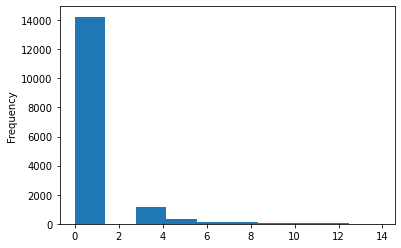

In [23]:
histToRobustZScore(dataset.impressions)

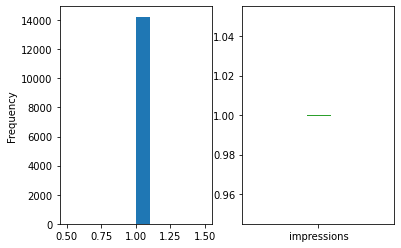

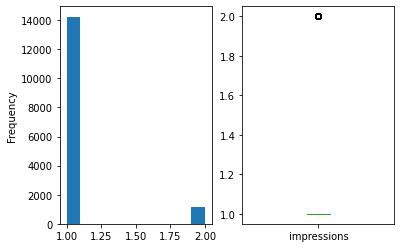

In [24]:
fig, axes = plt.subplots(1, 2)
removeBasedOnTukey(dataset.impressions).plot.hist(ax=axes[0])
removeBasedOnTukey(dataset.impressions).plot.box(ax=axes[1])
fig, axes = plt.subplots(1, 2)
removeBasedOnRobustZScore(dataset.impressions, 3.5).plot.hist(ax=axes[0])
removeBasedOnRobustZScore(dataset.impressions, 3.5).plot.box(ax=axes[1])

In [25]:
# Escolhemos usar o tukey
dataset.impressions = removeBasedOnTukey(dataset.impressions)

#### z-score

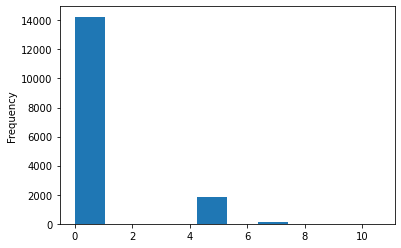

In [26]:
histToRobustZScore(dataset.adClicks)

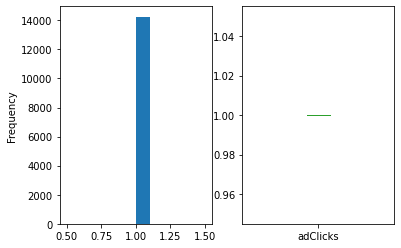

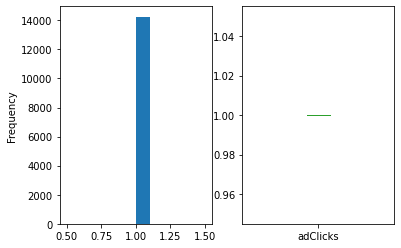

In [27]:
fig, axes = plt.subplots(1, 2)
removeBasedOnTukey(dataset.adClicks).plot.hist(ax=axes[0])
removeBasedOnTukey(dataset.adClicks).plot.box(ax=axes[1])
fig, axes = plt.subplots(1, 2)
removeBasedOnRobustZScore(dataset.adClicks, 3.5).plot.hist(ax=axes[0])
removeBasedOnRobustZScore(dataset.adClicks, 3.5).plot.box(ax=axes[1])

In [28]:
# Escolhemos usar o z-score robusto com 3.5 de threshold
dataset.adClicks = removeBasedOnRobustZScore(dataset.adClicks, 3.5)

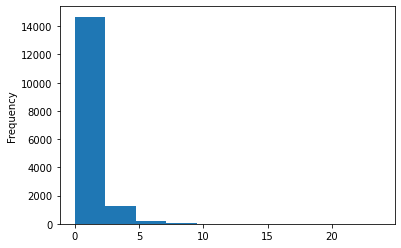

In [29]:
histToRobustZScore(dataset.adCost)

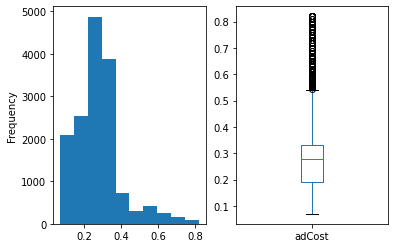

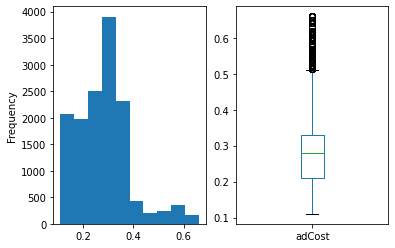

In [30]:
fig, axes = plt.subplots(1, 2)
removeBasedOnTukey(dataset.adCost).plot.hist(ax=axes[0])
removeBasedOnTukey(dataset.adCost).plot.box(ax=axes[1])
fig, axes = plt.subplots(1, 2)
removeBasedOnRobustZScore(dataset.adCost, 2).plot.hist(ax=axes[0])
removeBasedOnRobustZScore(dataset.adCost, 2).plot.box(ax=axes[1])

In [31]:
# Escolhemos usar o z-score robusto com 2 de threshold
dataset.adCost = removeBasedOnRobustZScore(dataset.adCost, 2)

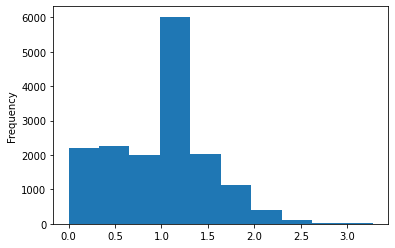

In [32]:
histToRobustZScore(dataset.timeOnPage)

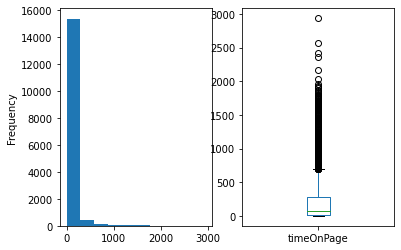

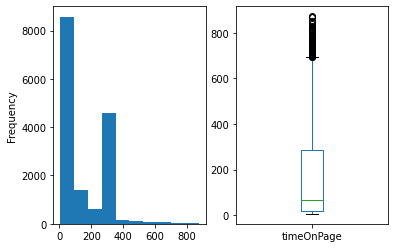

In [33]:
fig, axes = plt.subplots(1, 2)
removeBasedOnTukey(dataset.timeOnPage).plot.hist(ax=axes[0])
removeBasedOnTukey(dataset.timeOnPage).plot.box(ax=axes[1])
fig, axes = plt.subplots(1, 2)
removeBasedOnRobustZScore(dataset.timeOnPage, 2).plot.hist(ax=axes[0])
removeBasedOnRobustZScore(dataset.timeOnPage, 2).plot.box(ax=axes[1])

In [34]:
# Escolhemos usar o z-score robusto com 2 de threshold
dataset.timeOnPage = removeBasedOnRobustZScore(dataset.timeOnPage, 2.5)

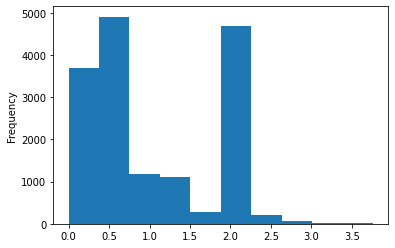

In [35]:
histToRobustZScore(dataset.pageviews)

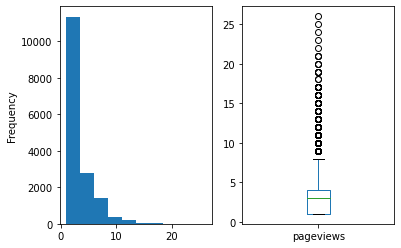

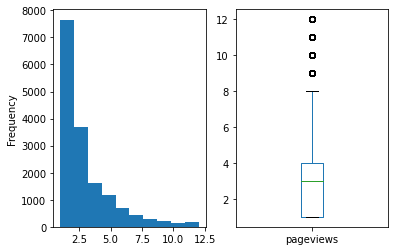

In [36]:
fig, axes = plt.subplots(1, 2)
removeBasedOnTukey(dataset.pageviews).plot.hist(ax=axes[0])
removeBasedOnTukey(dataset.pageviews).plot.box(ax=axes[1])
fig, axes = plt.subplots(1, 2)
removeBasedOnRobustZScore(dataset.pageviews, 2.5).plot.hist(ax=axes[0])
removeBasedOnRobustZScore(dataset.pageviews, 2.5).plot.box(ax=axes[1])

In [37]:
# Escolhemos usar o z-score robusto com 2.5 de threshold
dataset.pageviews = removeBasedOnRobustZScore(dataset.pageviews, 2.5)

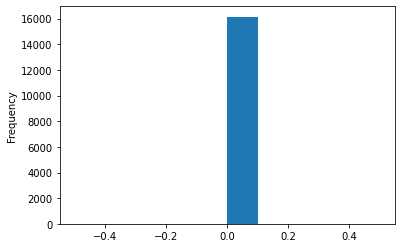

In [38]:
histToRobustZScore(dataset.ctr)

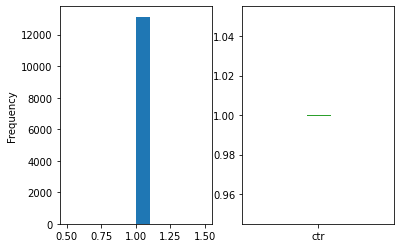

In [39]:
fig, axes = plt.subplots(1, 2)
removeBasedOnTukey(dataset.ctr).plot.hist(ax=axes[0])
removeBasedOnTukey(dataset.ctr).plot.box(ax=axes[1])

In [40]:
# Escolhemos usar o z-score robusto com 2.5 de threshold
dataset.ctr = removeBasedOnTukey(dataset.ctr)

impressions       AxesSubplot(0.125,0.657941;0.227941x0.222059)
adClicks       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
adCost         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
pageviews         AxesSubplot(0.125,0.391471;0.227941x0.222059)
timeOnPage     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
ctr            AxesSubplot(0.672059,0.391471;0.227941x0.222059)
dtype: object

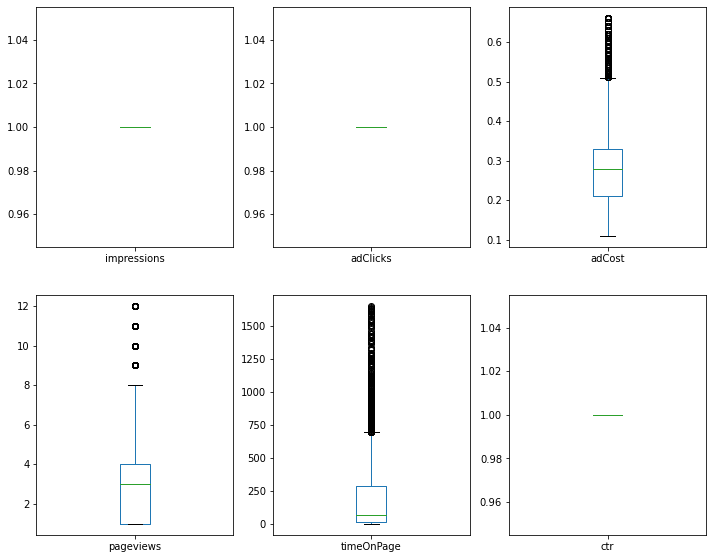

In [41]:
dataset.plot.box(subplots=True, layout=(3,3), figsize=(12,15))

## Visualizações e Descrições
Nessa terceira etapa temos a apresentação de estatística descritiva com as suas visualizações. 

In [42]:
dataset.describe(include=['category'])

,city,screenResolution,browser,operatingSystem,mobileDeviceInfo,adSlot,adMatchType,screenResolutionDist
count,16183,16183,16183,16183,16183,16183,16183,16183
unique,14,176,12,4,645,4,3,6
top,Olinda,360x640,Chrome,Android,Apple iPhone,Google search: Top,Broad match,x-small
freq,7015,7990,14497,15108,1010,13020,10905,15994


In [43]:
dataset.describe(include=['number'], percentiles=[.25, .50, .75, .90, .99])

,impressions,adClicks,adCost,pageviews,timeOnPage,ctr
count,14241.0,14245.0,14188.000000,16054.000000,16123.000000,13136.0
mean,1.0,1.0,0.279727,3.047153,144.219351,1.0
std,0.0,0.0,0.103547,2.133484,174.944376,0.0
min,1.0,1.0,0.110000,1.000000,3.000000,1.0
25%,1.0,1.0,0.210000,1.000000,17.000000,1.0
50%,1.0,1.0,0.280000,3.000000,67.000000,1.0
75%,1.0,1.0,0.330000,4.000000,288.200000,1.0
90%,1.0,1.0,0.380000,6.000000,288.200000,1.0
99%,1.0,1.0,0.620000,11.000000,878.000000,1.0
max,1.0,1.0,0.660000,12.000000,1651.000000,1.0


### Distribuição preço dos anúncios


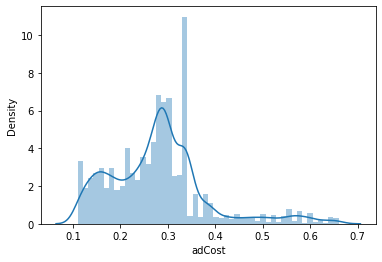

In [44]:
sbn.distplot(dataset.adCost)

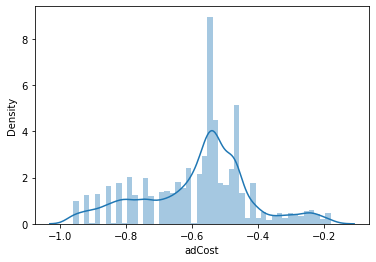

In [45]:
x = dataset.adCost
sbn.distplot(x.apply(log10))

### Preço médio de anúncio por cidade
Observou-se uma leve diferença do preço do anúncio em relação a região onde o usuário está pesquisando.

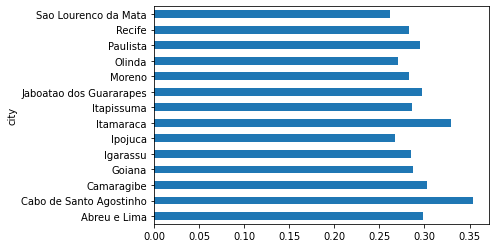

In [46]:
dataset.groupby(by='city').mean().adCost.dropna().plot.barh()

### Preço do anúncio por tempo na página
Não existiu correlação entre o tempo na página e o preço do anuncio.

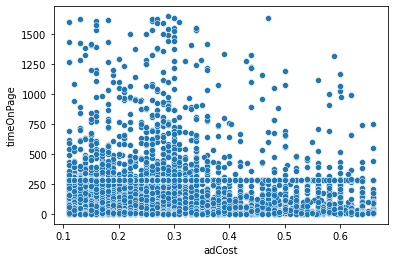

In [47]:
sbn.scatterplot(x=dataset.adCost, y=dataset.timeOnPage)

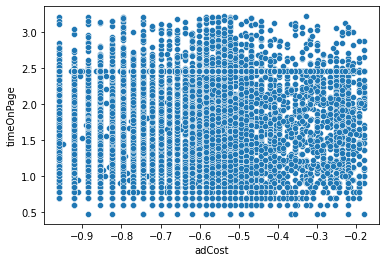

In [48]:
x = dataset.adCost
y = dataset.timeOnPage
sbn.scatterplot(x=x.apply(log10), y=y.apply(log10))

### Distribuição tempo na página

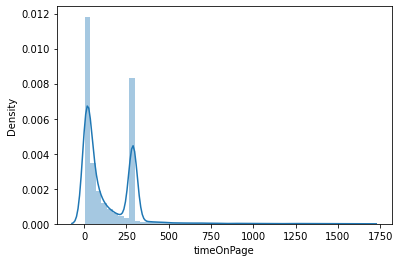

In [49]:
sbn.distplot(dataset.timeOnPage)

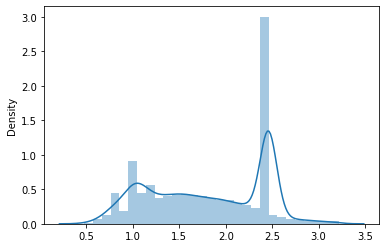

In [50]:
x = dataset.timeOnPage
sbn.distplot(x=x.apply(log10))

### Tempo na página por resolução de tela
Observou-se uma diferença aparente entre os tipos tamanho de tela e aparente tempo na página

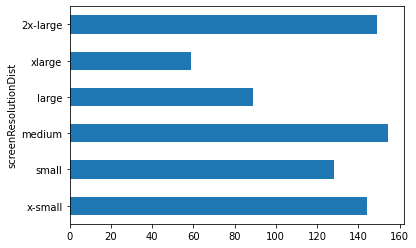

In [51]:
dataset.groupby(by='screenResolutionDist').mean().timeOnPage.dropna().plot.barh()

### Tempo na página por sistema operacional
Observou-se uma diferença entre o sistema operacional e o tempo na página.

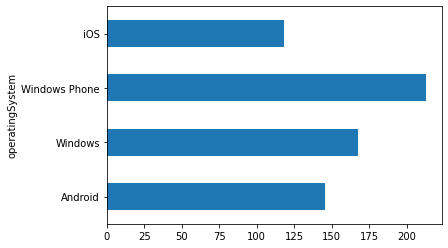

In [52]:
dataset.groupby(by='operatingSystem').mean().timeOnPage.dropna().plot.barh()

### Preço de anuncio por sistema operacional
Observou-se uma diferença entre o sistema operacional e o preço por anúncio.

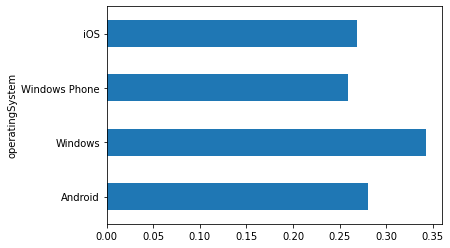

In [53]:
dataset[dataset.adCost < 1].groupby(by='operatingSystem').mean().adCost.dropna().plot.barh()

### Pagina vistadas por tempo médio no site

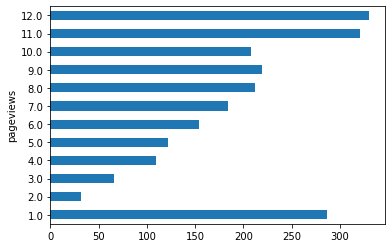

In [54]:
dataset.groupby(by='pageviews').mean().timeOnPage.dropna().plot.barh()

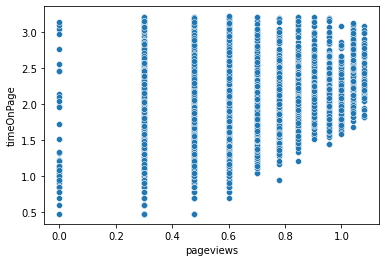

In [55]:
sbn.scatterplot(x=log10(dataset.pageviews), y=log10(dataset.timeOnPage))

### Tamanho da busca por tempo médio no site

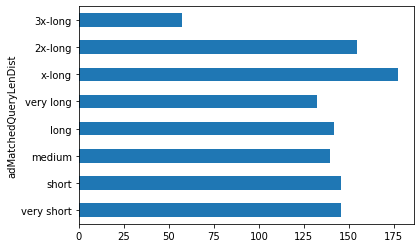

In [56]:
dataset.adMatchedQueryLen = dataset.adMatchedQuery.str.len()
dataset['adMatchedQueryLenDist'] = pd.cut(dataset.adMatchedQueryLen, 8, labels=['very short', 'short', 'medium', 'long', 'very long', 'x-long', '2x-long', '3x-long'])
dataset.groupby(by='adMatchedQueryLenDist').mean().timeOnPage.dropna().plot.barh()

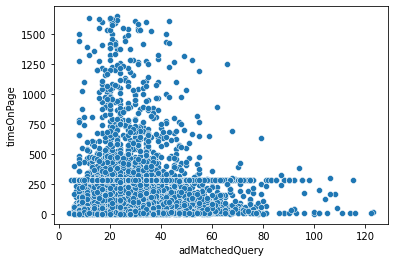

In [57]:
sbn.scatterplot(x=dataset.adMatchedQueryLen, y=dataset.timeOnPage)

### Tamanho da busca por custo do anuncio

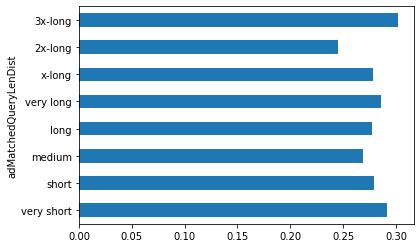

In [58]:
dataset.groupby(by='adMatchedQueryLenDist').mean().adCost.plot.barh()

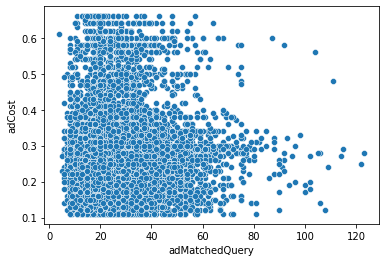

In [59]:
sbn.scatterplot(x=dataset.adMatchedQueryLen, y=dataset.adCost)

### Presença de termos na pesquisa X valor do clique / tempo na página
Nesse ponto temos a análise quebrando pequenos trechos da pesquisa e verificando sua correlação com o comportamento do consumidor. Novamente, essas técnicas não são utilizadas no escopo da disciplina, mas se demonstram bem úteis para entender o comportamento e melhorar o lead (no funil de vendas). São análises importantes para um webcomercio.  **(Bonus 2 - Utilizar técnicas não cobertas na aula)**

Abaixo verificamos qual termo é mais frequente e a correlação com o comportamento no site e o custo para o lead. O termo selecionado foi farmácia, por ser o mais frequente visto na análise abaixo.


In [60]:
dataset['adMatchedQuery'].value_counts()[:20]

farmacia pague menos                  338
farmacia delivery olinda              229
farmácia pague menos                  164
farmacia independente                 161
farmacia pague menos olinda           117
farmacia que faz entrega em olinda     91
farmacia 24 horas olinda               91
farmacia entrega olinda                89
farmacia do trabalhador                79
pague menos                            76
ultrafarma                             76
pague menos olinda                     76
farmácia independente                  76
farmacia em olinda                     76
farmacia                               73
farmacia permanente                    64
farmacia delivery                      64
farmacia com entrega em olinda         57
farmácia em olinda que faz entrega     55
farmácia que faz entrega em olinda     53
Name: adMatchedQuery, dtype: int64

In [61]:
def hasFarma(row):
  return "farm" in row['adMatchedQuery']

dataset['hasFarmaOnQuery'] = dataset.apply(hasFarma, axis=1)

In [62]:
dataset[(dataset.hasFarmaOnQuery == True)].describe(), dataset[(dataset.hasFarmaOnQuery == False)].describe()

(       impressions  adClicks       adCost    pageviews   timeOnPage     ctr
 count       7178.0    7249.0  7233.000000  8499.000000  8522.000000  6509.0
 mean           1.0       1.0     0.270139     3.168490   142.147336     1.0
 std            0.0       0.0     0.110783     2.153738   184.167765     0.0
 min            1.0       1.0     0.110000     1.000000     3.000000     1.0
 25%            1.0       1.0     0.180000     2.000000    15.000000     1.0
 50%            1.0       1.0     0.270000     3.000000    62.000000     1.0
 75%            1.0       1.0     0.320000     4.000000   288.200000     1.0
 max            1.0       1.0     0.660000    12.000000  1640.000000     1.0,
        impressions  adClicks       adCost    pageviews   timeOnPage     ctr
 count       7063.0    6996.0  6955.000000  7555.000000  7601.000000  6627.0
 mean           1.0       1.0     0.289698     2.910655   146.542429     1.0
 std            0.0       0.0     0.094422     2.102254   163.968685     0.

Aqui temos a análise entre a presenção (True) e a ausência (False) do termo "Farmácia" e o custo do clique. Aparentemente há uma diferença significativa, demonstrando que o algoritmo do Google realmente privilegia o termo da pesquisa e a relevância da página, reduzindo seu custo.

Mais a frente iremos verificar o tempo na página tentando medir o interesse pela página ou, talvez, a dificuldade de se utilizar o site e entender sobre qual se trata. Como a diferença pareceu menor, iremos utilizar apenas a análise do custo para testes de hipótese futuros.

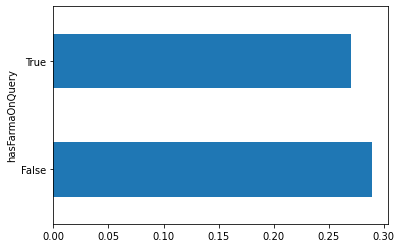

In [63]:
dataset[dataset.adCost < 1].groupby(by='hasFarmaOnQuery').mean().adCost.dropna().plot.barh()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f9f1c9550>,
      dtype=object)

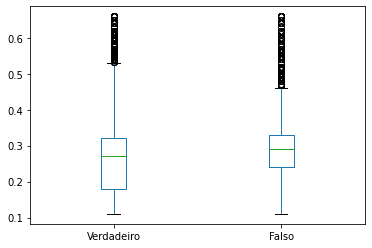

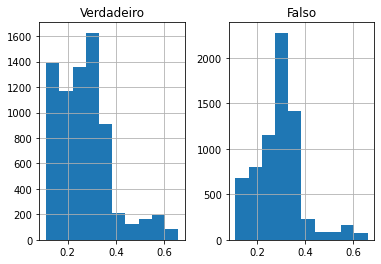

In [64]:
d = {'Verdadeiro' : dataset[(dataset.hasFarmaOnQuery == True)]["adCost"],
     'Falso' : dataset[(dataset.hasFarmaOnQuery == False)]["adCost"]}

df1 = pd.DataFrame(d)

df1.plot(kind='box')

df1.hist()

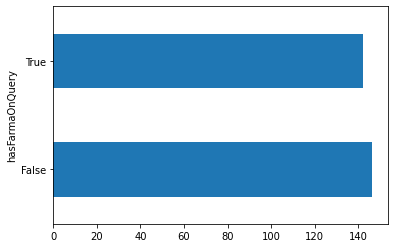

In [65]:
dataset.groupby(by='hasFarmaOnQuery').mean().timeOnPage.dropna().plot.barh()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f9ebe10d0>,
      dtype=object)

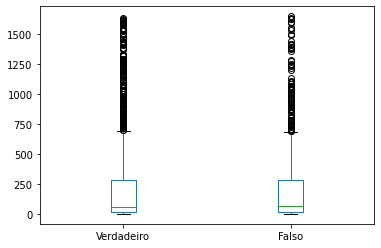

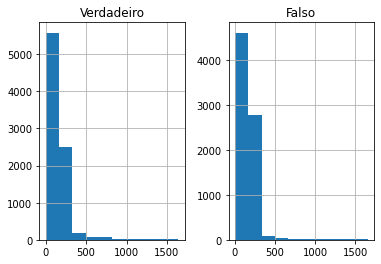

In [66]:
d = {'Verdadeiro' : dataset[(dataset.hasFarmaOnQuery == True)]["timeOnPage"],
     'Falso' : dataset[(dataset.hasFarmaOnQuery == False)]["timeOnPage"]}

df1 = pd.DataFrame(d)

df1.plot(kind='box')

df1.hist()

## Teste de hipóteses
Para fazermos os testes de hipóteses, devemos levantar pequenas suposições. A primeira delas é que deve haver alguma diferença estatisticamente significativa entre os elementos de uma análise. Para isso, iremos nos focar, mas não completamente, após visualização anterior, nos ítens dividido em três grupos: **(Preço médio de anúncio por cidade, Preço de anúncio por sistema operacional), (Tempo na página por resolução de tela, Tempo na página por sistema operacional) e o Tamanho da busca por tempo médio no site**. Por simplificação, iremos usar apenas 1 de cada grupo.


### Grupos não-pareados
Aqui vemos algumas técnicas não cobertas na aula. Visto que na maioria dos casos os dados possuem distribuição normal, métodos estatísticos para outros tipos de distribuição são mais incomuns e por esse motivo não são tão explorados. **(Bonus 2 - Utilizar técnicas não cobertas na aula)**

#### Preço médio de anúncio por cidade
Nesse ítem estamos tentando determinar se o valor do anúncio diferença estatística de acordo a cidade do usuário. É de senso comum que o usuário irá ter uma tendência maior a clicar no anúncio de um estabelecimento mais próximo da sua residência, e com isso o Google melhora o ranking desse anúncio diminuindo seu custo por clique. Estamos tentando confirmar se esse mecanismo realmente é eficiente ao setorizar seu anúncio por localidade ao selecionar duas cidades bem próximas: Recife e Olinda.

In [67]:
dataset.head()

,dateHourMinute,adMatchedQuery,city,screenResolution,browser,operatingSystem,mobileDeviceInfo,adSlot,adMatchType,impressions,adClicks,adCost,pageviews,timeOnPage,ctr,screenResolutionDist,locality,adMatchedQueryLenDist,hasFarmaOnQuery
0,2019-01-15 07:53:00,farmácia são paulo olinda estoque,Recife,360x640,Chrome,Android,Motorola Moto G (4) Moto G4,Google search: Top,Phrase match,1.0,1.0,0.27,1.0,288.2,1.0,x-small,Cordeiro,short,True
1,2019-01-15 07:54:00,farmacia independente olinda,Olinda,360x640,Chrome,Android,Samsung SM-A520F Galaxy A5 (2017),Google search: Top,Broad match,1.0,1.0,0.27,3.0,15.0,1.0,x-small,Casa Caiada,short,True
2,2019-01-15 08:12:00,vick baby rub comprar,Olinda,360x640,Chrome,Android,Samsung SM-G531H Galaxy Grand Prime,Google search: Other,Broad match,1.0,1.0,0.23,NaN,276.0,1.0,x-small,Casa Caiada,short,False
3,2019-01-15 08:50:00,lacday similar,Recife,320x569,Chrome,Android,Samsung SM-G570M J5 Prime,Google search: Top,Phrase match,1.0,1.0,0.27,3.0,38.0,1.0,x-small,Cordeiro,very short,False
4,2019-01-15 09:39:00,velunid generico onde comprar,Paulista,360x640,Chrome,Android,Motorola Moto G (4) Moto G4,Google search: Top,Broad match,1.0,1.0,0.27,3.0,13.0,1.0,x-small,Paulista,short,False


In [68]:
print("Recife:\n{}\n----------------\nOlinda:\n{}".format(dataset[(dataset.city == "Recife")].describe()["adCost"], dataset[(dataset.city == "Olinda")].describe()["adCost"]))

Recife:
count    5448.000000
mean        0.282559
std         0.100679
min         0.110000
25%         0.220000
50%         0.280000
75%         0.330000
max         0.660000
Name: adCost, dtype: float64
----------------
Olinda:
count    6023.000000
mean        0.270370
std         0.107512
min         0.110000
25%         0.180000
50%         0.270000
75%         0.320000
max         0.660000
Name: adCost, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f9e9e83d0>,
      dtype=object)

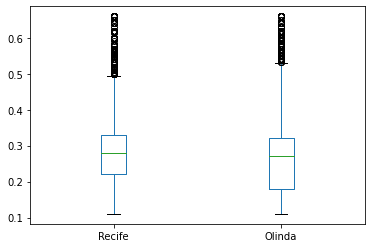

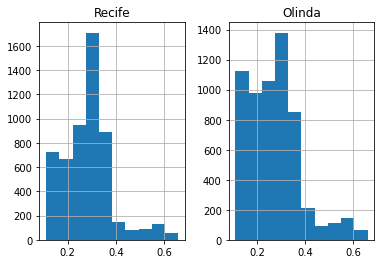

In [69]:
d = {'Recife' : dataset[(dataset.city == "Recife")]["adCost"],
     'Olinda' : dataset[(dataset.city == "Olinda")]["adCost"]}

df1 = pd.DataFrame(d)

df1.plot(kind='box')

df1.hist()

In [70]:
#Shapiro-Wilk teste de normalidade (valor,p-value). Hipótese nula: a população é normalmente distribuída.
rec = stats.shapiro(dataset[(dataset.city == "Recife")]["adCost"].dropna())
oli = stats.shapiro(dataset[(dataset.city == "Olinda")]["adCost"].dropna())
print(rec, oli)
if oli[1] > 0.05 and rec[1] > 0.05:
  print("Segue uma distribuição normal, segundo Shapiro-Wilk\n")
else:
  print("Não segue uma distribuição normal, segundo Shapiro-Wilk\n")

#
rec = stats.skewtest(dataset[(dataset.city == "Recife")]["adCost"].dropna())
oli = stats.skewtest(dataset[(dataset.city == "Olinda")]["adCost"].dropna())
print(rec, oli)
if oli[1] > 0.05 and rec[1] > 0.05:
  print("Segue uma distribuição normal, segundo skewtest\n")
else:
  print("Não segue uma distribuição normal, segundo skewtest\n")


#

rec = stats.normaltest(dataset[(dataset.city == "Recife")]["adCost"].dropna())
oli = stats.normaltest(dataset[(dataset.city == "Olinda")]["adCost"].dropna())
print(rec, oli)
if oli[1] > 0.05 and rec[1] > 0.05:
  print("Segue uma distribuição normal, segundo teste de normalidade\n")
else:
  print("Não segue uma distribuição normal, segundo teste de normalidade\n")


(0.9136242866516113, 0.0) (0.9265339374542236, 0.0)
Não segue uma distribuição normal, segundo Shapiro-Wilk

SkewtestResult(statistic=26.124812854369686, pvalue=1.9054226574401365e-150) SkewtestResult(statistic=27.22058696587856, pvalue=3.706480539729268e-163)
Não segue uma distribuição normal, segundo skewtest

NormaltestResult(statistic=953.2171392986468, pvalue=1.0269000464384214e-207) NormaltestResult(statistic=933.8978179340148, pvalue=1.6094055879333465e-203)
Não segue uma distribuição normal, segundo teste de normalidade



Aqui utilizamos o teste de Mann Whitney, pois nossa distribuição não seguia uma normal e por que os dados não eram pareados. Apenas como demonstração da ferramenta, simulamos um truncamento entre os dados, de modo a mantê-los pareados e aplicarmos o teste-t. Mas apenas para demonstração da ferramenta.

In [71]:
#considerando um teste t pareado, MAS NÃO É O CASO!
#two-sided test for the null hypothesis that 2 related or repeated samples have identical average (expected) values.
#truncando a tabela para 5448 eventos, conseguimos gerar o teste t COMO SE FOSSE PAREADO
test_t = stats.ttest_rel(dataset[(dataset.city == "Recife")]["adCost"].dropna(), dataset[(dataset.city == "Olinda")]["adCost"].dropna().iloc[0:5448])
print(test_t)
if test_t[1] > 0.05:
  print("Não se pode rejeitar a hipotese nula de valores médios idênticos\n")
else:
  print("Deve-se rejeitar a hipotese nula de que as médias são iguais\n")

#considerando um teste teste não-pareado, correto
test_mann = stats.mannwhitneyu(dataset[(dataset.city == "Recife")]["adCost"].dropna(), dataset[(dataset.city == "Olinda")]["adCost"].dropna())
print(test_mann)
if test_mann[1] < 0.05:
  print("Rejeitar a hipotese alternativa de distribuição igual entre amostras: Menor\n")
else:
  print("Não se deve-se rejeitar a hipotese alternativa de distribuição igual entre amostras: Maior\n")

Ttest_relResult(statistic=9.20239557684817, pvalue=4.8859782499665723e-20)
Deve-se rejeitar a hipotese nula de que as médias são iguais

MannwhitneyuResult(statistic=14948173.0, pvalue=8.385551826993677e-17)
Rejeitar a hipotese alternativa de distribuição igual entre amostras: Menor



#### Tempo na página por resolução de tela
Nesse ítem estamos tentando determinar se, de acordo com a resolução de tela do dispositivo, ocorre uma variação no tempo da tela. Podemos inferir tanto a facilidade em se obter informações, quanto ao poder aquisitivo do usuário e o interesse pelo site. A hipotese é se existe diferença significativa entre os dispositivos sobre o comportamento do usuário no site.

De modo a ficar mais justa a comparação, utilizamos apenas a comparação entre os grupos `small` e `medium`

In [72]:
dataset[(dataset.screenResolutionDist == "small")].describe(), dataset[(dataset.screenResolutionDist == "medium")].describe()

(       impressions  adClicks     adCost   pageviews  timeOnPage   ctr
 count         95.0      96.0  94.000000  103.000000  103.000000  92.0
 mean           1.0       1.0   0.263404    3.077670  128.221359   1.0
 std            0.0       0.0   0.098958    1.913263  129.515459   0.0
 min            1.0       1.0   0.120000    1.000000    4.000000   1.0
 25%            1.0       1.0   0.180000    2.000000   23.000000   1.0
 50%            1.0       1.0   0.270000    3.000000   68.000000   1.0
 75%            1.0       1.0   0.327500    4.000000  288.200000   1.0
 max            1.0       1.0   0.660000   11.000000  482.000000   1.0,
        impressions  adClicks     adCost  pageviews  timeOnPage   ctr
 count         74.0      76.0  79.000000  81.000000   82.000000  69.0
 mean           1.0       1.0   0.280759   2.728395  154.609756   1.0
 std            0.0       0.0   0.105924   1.843993  156.033453   0.0
 min            1.0       1.0   0.110000   1.000000    4.000000   1.0
 25%      

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f9e8003d0>,
      dtype=object)

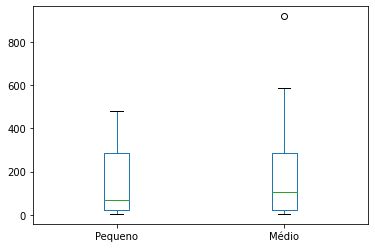

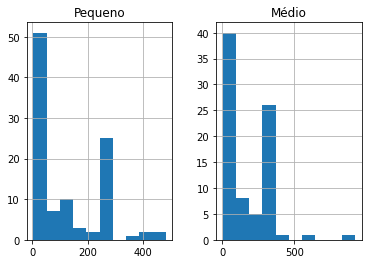

In [73]:
d = {'Pequeno' : dataset[(dataset.screenResolutionDist == "small")]["timeOnPage"],
     'Médio' : dataset[(dataset.screenResolutionDist == "medium")]["timeOnPage"]}

df1 = pd.DataFrame(d)

df1.plot(kind='box')

df1.hist()

#### Tempo na página por Sistema Operacional
Como não observamos, em inspeção simples visual nenhuma diferença significativa, apostamos em outra análise que tenta verificar o tipo de sistema operacional e o nível de engajamento na página, medido pelo tempo na página


In [74]:
dataset[(dataset.operatingSystem == "iOS")].describe(), dataset[(dataset.operatingSystem == "Android")].describe()

(       impressions  adClicks      adCost    pageviews   timeOnPage    ctr
 count        882.0     930.0  871.000000  1049.000000  1049.000000  821.0
 mean           1.0       1.0    0.268958     2.633937   118.426692    1.0
 std            0.0       0.0    0.107576     1.661024   165.783406    0.0
 min            1.0       1.0    0.110000     1.000000     3.000000    1.0
 25%            1.0       1.0    0.180000     2.000000    10.000000    1.0
 50%            1.0       1.0    0.270000     2.000000    32.000000    1.0
 75%            1.0       1.0    0.320000     3.000000   288.200000    1.0
 max            1.0       1.0    0.640000    12.000000  1611.000000    1.0,
        impressions  adClicks        adCost     pageviews    timeOnPage  \
 count      13338.0   13293.0  13292.000000  14980.000000  15049.000000   
 mean           1.0       1.0      0.280446      3.076836    145.915330   
 std            0.0       0.0      0.103226      2.159607    175.429133   
 min            1.0     

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f9e674490>,
      dtype=object)

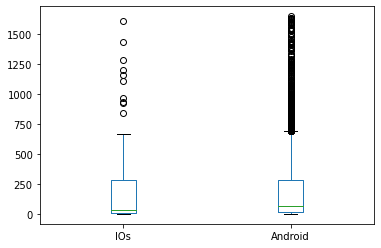

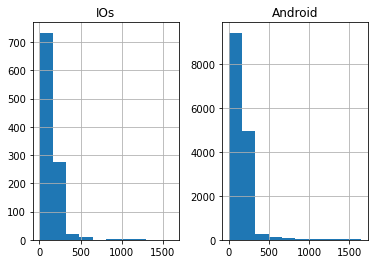

In [75]:
d = {'IOs' : dataset[(dataset.operatingSystem == "iOS")]["timeOnPage"],
     'Android' : dataset[(dataset.operatingSystem == "Android")]["timeOnPage"]}

df1 = pd.DataFrame(d)

df1.plot(kind='box')

df1.hist()

In [76]:
#Shapiro-Wilk teste de normalidade (valor,p-value). Hipótese nula: a população é normalmente distribuída.
rec = stats.shapiro(dataset[(dataset.operatingSystem == "iOS")]["timeOnPage"].dropna())
oli = stats.shapiro(dataset[(dataset.operatingSystem == "Android")]["timeOnPage"].dropna())
print(rec, oli)
if oli[1] > 0.05 and rec[1] > 0.05:
  print("Segue uma distribuição normal, segundo Shapiro-Wilk\n")
else:
  print("Não segue uma distribuição normal, segundo Shapiro-Wilk\n")

#
rec = stats.skewtest(dataset[(dataset.operatingSystem == "iOS")]["timeOnPage"].dropna())
oli = stats.skewtest(dataset[(dataset.operatingSystem == "Android")]["timeOnPage"].dropna())
print(rec, oli)
if oli[1] > 0.05 and rec[1] > 0.05:
  print("Segue uma distribuição normal, segundo skewtest\n")
else:
  print("Não segue uma distribuição normal, segundo skewtest\n")


#

rec = stats.normaltest(dataset[(dataset.operatingSystem == "iOS")]["timeOnPage"].dropna())
oli = stats.normaltest(dataset[(dataset.operatingSystem == "Android")]["timeOnPage"].dropna())
print(rec, oli)
if oli[1] > 0.05 and rec[1] > 0.05:
  print("Segue uma distribuição normal, segundo teste de normalidade\n")
else:
  print("Não segue uma distribuição normal, segundo teste de normalidade\n")


(0.6507678627967834, 8.491868693808391e-42) (0.6870342493057251, 0.0)
Não segue uma distribuição normal, segundo Shapiro-Wilk

SkewtestResult(statistic=22.2811147428038, pvalue=5.633821990847054e-110) SkewtestResult(statistic=82.2326620369642, pvalue=0.0)
Não segue uma distribuição normal, segundo skewtest

NormaltestResult(statistic=752.2123718034916, pvalue=4.5620375244997455e-164) NormaltestResult(statistic=10120.320732057793, pvalue=0.0)
Não segue uma distribuição normal, segundo teste de normalidade



Novamente sabemos abaixo que o teste t não cabe ao problema relatado, visto que os dados não estão agrupados como antes e depois. Mas foi objetivo demosntrar a ferramenta e seu uso.

In [77]:
#considerando um teste t pareado, MAS NÃO É O CASO!
#two-sided test for the null hypothesis that 2 related or repeated samples have identical average (expected) values.
#truncando a tabela para 5448 eventos, conseguimos gerar o teste t COMO SE FOSSE PAREADO

test_t = stats.ttest_rel(dataset[(dataset.operatingSystem == "iOS")]["timeOnPage"].dropna(),
                         dataset[(dataset.operatingSystem == "Android")]["timeOnPage"].dropna().iloc[0:dataset[(dataset.operatingSystem == "iOS")]["timeOnPage"].dropna().count()])
print(test_t)
if test_t[1] > 0.05:
  print("Não se pode rejeitar a hipotese nula de valores médios idênticos\n")
else:
  print("Deve-se rejeitar a hipotese nula de que as médias são iguais\n")

#considerando um teste teste não-pareado, correto
test_mann = stats.mannwhitneyu(dataset[(dataset.operatingSystem == "iOS")]["timeOnPage"].dropna(), 
                               dataset[(dataset.operatingSystem == "Android")]["timeOnPage"].dropna())
print(test_mann)
if test_mann[1] < 0.05:
  print("Rejeitar a hipotese alternativa de distribuição igual entre amostras: Menor\n")
else:
  print("Não se deve-se rejeitar a hipotese alternativa de distribuição igual entre amostras: Maior\n")

Ttest_relResult(statistic=-6.15640973441893, pvalue=1.0582926064028255e-09)
Deve-se rejeitar a hipotese nula de que as médias são iguais

MannwhitneyuResult(statistic=6512817.5, pvalue=4.993703416097454e-22)
Rejeitar a hipotese alternativa de distribuição igual entre amostras: Menor



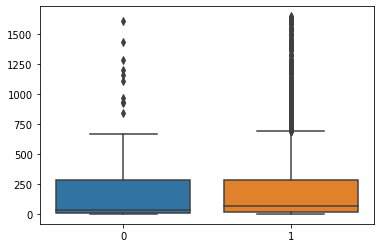

In [78]:
sbn.boxplot(data=[dataset[(dataset.operatingSystem == "iOS")]["timeOnPage"].dropna(), dataset[(dataset.operatingSystem == "Android")]["timeOnPage"].dropna()])

#### Custo da propaganda por Termo da pesquisa
Nesse ítem estamos tentando determinar se, palavras chaves mais características tem impacto no preço por clique. A hipotese é se existe diferença significativa dos usuários que buscam diretamente o termo "Farmácia" e os que buscam apenas termos correlacionados. A escolha do termo farmácia é devido a maior frequência.

In [79]:
dataset[(dataset.hasFarmaOnQuery == True)].describe(), dataset[(dataset.hasFarmaOnQuery == False)].describe()

(       impressions  adClicks       adCost    pageviews   timeOnPage     ctr
 count       7178.0    7249.0  7233.000000  8499.000000  8522.000000  6509.0
 mean           1.0       1.0     0.270139     3.168490   142.147336     1.0
 std            0.0       0.0     0.110783     2.153738   184.167765     0.0
 min            1.0       1.0     0.110000     1.000000     3.000000     1.0
 25%            1.0       1.0     0.180000     2.000000    15.000000     1.0
 50%            1.0       1.0     0.270000     3.000000    62.000000     1.0
 75%            1.0       1.0     0.320000     4.000000   288.200000     1.0
 max            1.0       1.0     0.660000    12.000000  1640.000000     1.0,
        impressions  adClicks       adCost    pageviews   timeOnPage     ctr
 count       7063.0    6996.0  6955.000000  7555.000000  7601.000000  6627.0
 mean           1.0       1.0     0.289698     2.910655   146.542429     1.0
 std            0.0       0.0     0.094422     2.102254   163.968685     0.

In [80]:
#Shapiro-Wilk teste de normalidade (valor,p-value). Hipótese nula: a população é normalmente distribuída.
rec = stats.shapiro(dataset[(dataset.hasFarmaOnQuery == True)]["adCost"].dropna())
oli = stats.shapiro(dataset[(dataset.hasFarmaOnQuery == False)]["adCost"].dropna())
print(rec, oli)
if oli[1] > 0.05 and rec[1] > 0.05:
  print("Segue uma distribuição normal, segundo Shapiro-Wilk\n")
else:
  print("Não segue uma distribuição normal, segundo Shapiro-Wilk\n")

#
rec = stats.skewtest(dataset[(dataset.hasFarmaOnQuery == True)]["adCost"].dropna())
oli = stats.skewtest(dataset[(dataset.hasFarmaOnQuery == False)]["adCost"].dropna())
print(rec, oli)
if oli[1] > 0.05 and rec[1] > 0.05:
  print("Segue uma distribuição normal, segundo skewtest\n")
else:
  print("Não segue uma distribuição normal, segundo skewtest\n")


#

rec = stats.normaltest(dataset[(dataset.hasFarmaOnQuery == True)]["adCost"].dropna())
oli = stats.normaltest(dataset[(dataset.hasFarmaOnQuery == False)]["adCost"].dropna())
print(rec, oli)
if oli[1] > 0.05 and rec[1] > 0.05:
  print("Segue uma distribuição normal, segundo teste de normalidade\n")
else:
  print("Não segue uma distribuição normal, segundo teste de normalidade\n")


(0.9159135818481445, 0.0) (0.9159242510795593, 0.0)
Não segue uma distribuição normal, segundo Shapiro-Wilk

SkewtestResult(statistic=31.501478773976377, pvalue=8.290719583461784e-218) SkewtestResult(statistic=28.40474741224878, pvalue=1.766747764080991e-177)
Não segue uma distribuição normal, segundo skewtest

NormaltestResult(statistic=1230.3181456733394, pvalue=6.915270524364068e-268) NormaltestResult(statistic=1214.602520539399, pvalue=1.7881906180714973e-264)
Não segue uma distribuição normal, segundo teste de normalidade



In [81]:
#considerando um teste t pareado, MAS NÃO É O CASO!
#two-sided test for the null hypothesis that 2 related or repeated samples have identical average (expected) values.
#truncando a tabela para 5448 eventos, conseguimos gerar o teste t COMO SE FOSSE PAREADO

test_t = stats.ttest_rel(dataset[(dataset.hasFarmaOnQuery == True)]["adCost"].dropna().iloc[0:dataset[(dataset.hasFarmaOnQuery == False)]["adCost"].dropna().count()],
                         dataset[(dataset.hasFarmaOnQuery == False)]["adCost"].dropna())
print(test_t)
if test_t[1] > 0.05:
  print("Não se pode rejeitar a hipotese nula de valores médios idênticos\n")
else:
  print("Deve-se rejeitar a hipotese nula de que as médias são iguais\n")

#considerando um teste teste não-pareado, correto
test_mann = stats.mannwhitneyu(dataset[(dataset.hasFarmaOnQuery == True)]["adCost"].dropna(), 
                               dataset[(dataset.hasFarmaOnQuery == False)]["adCost"].dropna())
print(test_mann)
if test_mann[1] < 0.05:
  print("Rejeitar a hipotese alternativa de distribuição igual entre amostras: Menor\n")
else:
  print("Não se deve-se rejeitar a hipotese alternativa de distribuição igual entre amostras: Maior\n")

Ttest_relResult(statistic=-13.332396559942039, pvalue=4.641118557733731e-40)
Deve-se rejeitar a hipotese nula de que as médias são iguais

MannwhitneyuResult(statistic=20962762.0, pvalue=1.346322454955512e-66)
Rejeitar a hipotese alternativa de distribuição igual entre amostras: Menor



# Conclusões

Foi possível concluir que as ferramentas de análise permitiram dar informações importantes para os pequenos comercios que precisam evitar desgastes e desperdícios advindos apenas do senso comum. As ferramentas estatísticas permitiram direcionar investimentos em um perfil de consumidor mais rentável, importante nesse período mais sensívell da economia.